In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [37]:
resume_df = pd.read_csv('../data/resume-mining.csv')

In [38]:
# view dataset
resume_df

,job_ad_id,job_city,job_industry,job_type,job_fed_contractor,job_equal_opp_employer,job_ownership,job_req_any,job_req_communication,job_req_education,...,honors,worked_during_school,years_experience,computer_skills,special_skills,volunteer,military,employment_holes,has_email_address,resume_quality
0,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,0,6,1,0,0,0,1,0,low
1,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,1,6,1,0,1,1,0,1,high
2,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,1,6,1,0,0,0,0,0,low
3,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,0,6,1,1,1,0,1,1,high
4,385,Chicago,other_service,secretary,0.0,1,nonprofit,1,0,0,...,0,1,22,1,0,0,0,0,1,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4865,1344,Boston,finance_insurance_real_estate,secretary,0.0,0,private,1,0,0,...,0,0,1,1,1,0,0,1,0,low
4866,382,Boston,other_service,manager,NaN,0,unknown,0,0,0,...,0,1,6,1,0,0,0,0,0,low
4867,382,Boston,other_service,manager,NaN,0,unknown,0,0,0,...,0,1,8,1,0,1,0,0,1,high
4868,382,Boston,other_service,manager,NaN,0,unknown,0,0,0,...,0,1,2,1,0,1,1,0,1,high


In [39]:
# check null value
print(resume_df.isnull().sum())

job_ad_id                    0
job_city                     0
job_industry                 0
job_type                     0
job_fed_contractor        1768
job_equal_opp_employer       0
job_ownership                0
job_req_any                  0
job_req_communication        0
job_req_education            0
job_req_min_experience    2746
job_req_computer             0
job_req_organization         0
job_req_school               0
received_callback            0
firstname                    0
race                         0
gender                       0
years_college                0
college_degree               0
honors                       0
worked_during_school         0
years_experience             0
computer_skills              0
special_skills               0
volunteer                    0
military                     0
employment_holes             0
has_email_address            0
resume_quality               0
dtype: int64


## Visualize data

<function matplotlib.pyplot.show(close=None, block=None)>

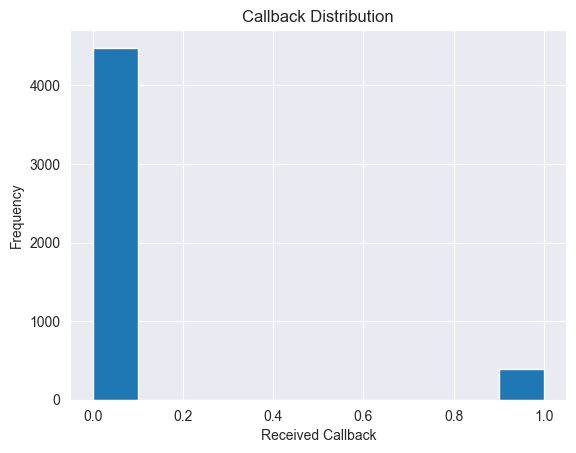

In [40]:
# visualize callback rates distribution
plt.hist(resume_df['received_callback'])
plt.xlabel('Received Callback')
plt.ylabel("Frequency")
plt.title("Callback Distribution")
plt.show

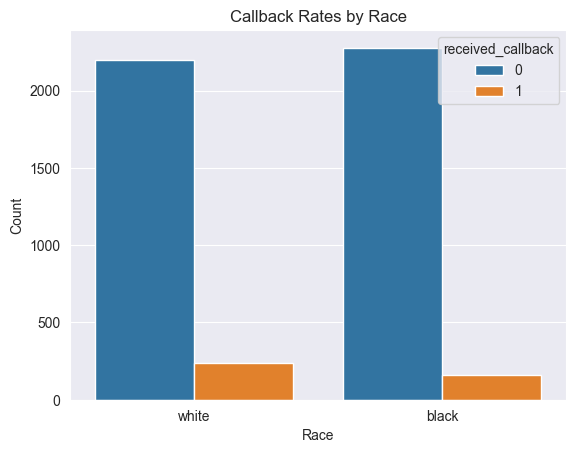

In [41]:
# Visualize callback rates by race
sns.countplot(x='race', hue='received_callback', data=resume_df)
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Callback Rates by Race')
plt.show()

In [42]:
# Calculate callbacks rates by race
race_callbacks_rates = resume_df.groupby('race')['received_callback'].mean()
print(race_callbacks_rates)

race
black    0.064476
white    0.096509
Name: received_callback, dtype: float64


In [43]:
# Calculate callbacks rates by gender
gender_callbacks_rates = resume_df.groupby('gender')['received_callback'].mean()
print(gender_callbacks_rates)

gender
f    0.082488
m    0.073843
Name: received_callback, dtype: float64


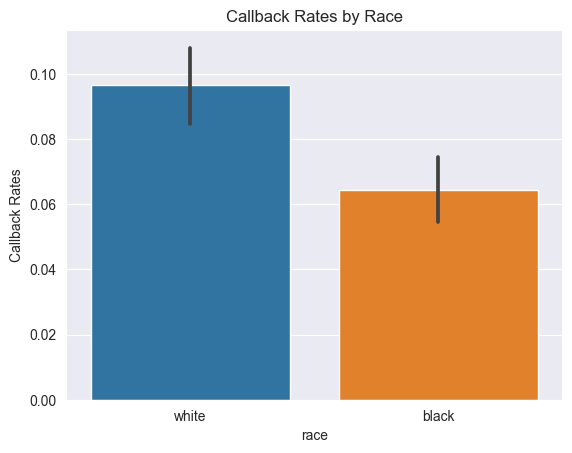

In [44]:
# Visualize callback rates by race
sns.barplot(x='race', y='received_callback', data=resume_df)
plt.xlabel('race')
plt.ylabel('Callback Rates')
plt.title("Callback Rates by Race")
plt.show()

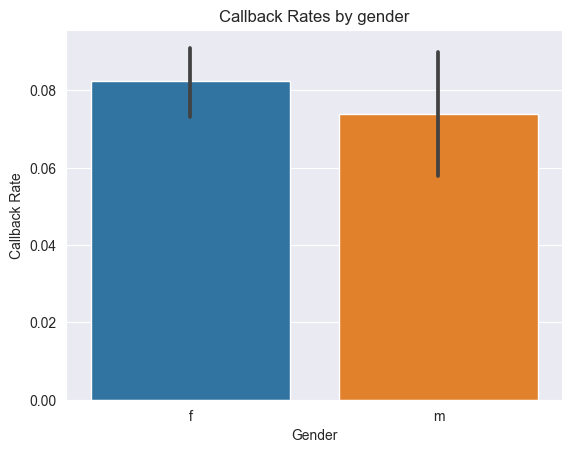

In [45]:
# Visualize callback rates by gender
sns.barplot(x='gender', y='received_callback', data=resume_df)
plt.xlabel('Gender')
plt.ylabel('Callback Rate')
plt.title("Callback Rates by gender")
plt.show()

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
# Evaluate model performance
def evaluate_model(y_true, y_pred, y_probs):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    auc_roc = roc_auc_score(y_true, y_probs)
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'AUC-ROC: {auc_roc:.4f}')

## Logistic Regression and Random Forest

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [48]:
resume_df

,job_ad_id,job_city,job_industry,job_type,job_fed_contractor,job_equal_opp_employer,job_ownership,job_req_any,job_req_communication,job_req_education,...,honors,worked_during_school,years_experience,computer_skills,special_skills,volunteer,military,employment_holes,has_email_address,resume_quality
0,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,0,6,1,0,0,0,1,0,low
1,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,1,6,1,0,1,1,0,1,high
2,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,1,6,1,0,0,0,0,0,low
3,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,0,6,1,1,1,0,1,1,high
4,385,Chicago,other_service,secretary,0.0,1,nonprofit,1,0,0,...,0,1,22,1,0,0,0,0,1,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4865,1344,Boston,finance_insurance_real_estate,secretary,0.0,0,private,1,0,0,...,0,0,1,1,1,0,0,1,0,low
4866,382,Boston,other_service,manager,NaN,0,unknown,0,0,0,...,0,1,6,1,0,0,0,0,0,low
4867,382,Boston,other_service,manager,NaN,0,unknown,0,0,0,...,0,1,8,1,0,1,0,0,1,high
4868,382,Boston,other_service,manager,NaN,0,unknown,0,0,0,...,0,1,2,1,0,1,1,0,1,high


In [49]:
# Select features
features = ['race', 'gender', 'years_college', 'college_degree', 'honors',
            'worked_during_school', 'years_experience', 'computer_skills',
            'special_skills', 'volunteer', 'military', 'employment_holes',
            'has_email_address']

target = 'received_callback'

In [50]:
# convert categorical variables to numerical using one-hot encoding
resume_df_encoded = pd.get_dummies(resume_df[features + [target]])
resume_df_encoded

,years_college,college_degree,honors,worked_during_school,years_experience,computer_skills,special_skills,volunteer,military,employment_holes,has_email_address,received_callback,race_black,race_white,gender_f,gender_m
0,4,1,0,0,6,1,0,0,0,1,0,0,False,True,True,False
1,3,0,0,1,6,1,0,1,1,0,1,0,False,True,True,False
2,4,1,0,1,6,1,0,0,0,0,0,0,True,False,True,False
3,3,0,0,0,6,1,1,1,0,1,1,0,True,False,True,False
4,3,0,0,1,22,1,0,0,0,0,1,0,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4865,3,0,0,0,1,1,1,0,0,1,0,0,True,False,True,False
4866,4,1,0,1,6,1,0,0,0,0,0,0,True,False,True,False
4867,4,1,0,1,8,1,0,1,0,0,1,0,False,True,False,True
4868,4,1,0,1,2,1,0,1,1,0,1,0,True,False,True,False


In [51]:
# split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(resume_df_encoded.drop(target, axis=1), resume_df_encoded[target], test_size=0.2, random_state=42)

In [52]:
# view X_train, X_test, y_train, y_test
y_train

1187    0
2540    1
1117    0
2934    0
4165    0
       ..
4426    0
466     0
3092    0
3772    1
860     0
Name: received_callback, Length: 3896, dtype: int64

### Train and Evaluate Logistic Model

In [53]:
# train logistic model
LogisticModel = LogisticRegression()
LogisticModel.fit(X_train, y_train)

C:\Users\Thai\.conda\envs\thesis-env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
logreg_preds = LogisticModel.predict(X_test)
logreg_probs = LogisticModel.predict_proba(X_test)[:, 1]

In [55]:
print('Logistic Regression:')
evaluate_model(y_test, logreg_preds, logreg_probs)

Logistic Regression:
Accuracy: 0.9343
Precision: 0.0000
Recall: 0.0000
AUC-ROC: 0.6525


C:\Users\Thai\.conda\envs\thesis-env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
X_test

,years_college,college_degree,honors,worked_during_school,years_experience,computer_skills,special_skills,volunteer,military,employment_holes,has_email_address,race_black,race_white,gender_f,gender_m
1654,4,1,0,1,2,1,0,1,1,0,1,False,True,True,False
1101,4,1,0,1,6,1,1,1,0,1,1,True,False,True,False
1149,2,0,1,0,8,0,0,0,0,1,0,True,False,True,False
2763,2,0,0,0,6,1,0,0,0,0,0,True,False,True,False
3145,4,1,0,1,14,1,1,1,0,0,0,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,3,0,0,1,7,1,1,0,0,1,0,False,True,True,False
1510,4,1,0,1,6,1,0,0,0,1,0,True,False,True,False
3418,2,0,0,0,6,1,0,0,0,0,0,False,True,True,False
680,3,0,0,0,21,1,1,1,0,1,1,False,True,True,False


In [57]:
# logistic regression result
logreg_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Train and Evaluate Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
RandomForest = RandomForestClassifier()
RandomForest.fit(X_train, y_train)

RandomForestClassifier()

In [60]:
RandomForest_pred = RandomForest.predict(X_test)

In [61]:
# prediction result random forest
RandomForest_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [62]:
RandomForest_probs = RandomForest.predict_proba(X_test)[:, 1]

In [63]:
RandomForest_probs

array([2.48045065e-02, 1.00000000e-02, 6.66666667e-03, 0.00000000e+00,
       0.00000000e+00, 7.45140382e-02, 1.73626528e-01, 3.65196777e-02,
       5.00000000e-03, 3.65196777e-02, 3.63134921e-01, 0.00000000e+00,
       0.00000000e+00, 7.81585535e-02, 4.38596491e-03, 5.75000000e-02,
       1.00000000e-03, 1.06681138e-01, 6.61048135e-02, 0.00000000e+00,
       7.77777778e-03, 0.00000000e+00, 4.20882900e-01, 4.84384921e-01,
       1.17953089e-01, 2.11956522e-03, 1.04562247e-02, 0.00000000e+00,
       8.70851173e-02, 1.42857143e-03, 0.00000000e+00, 1.46882922e-01,
       0.00000000e+00, 1.11111111e-03, 1.15704296e-02, 9.71938631e-02,
       0.00000000e+00, 2.87500000e-01, 1.98550792e-01, 3.65196777e-02,
       0.00000000e+00, 7.00705128e-01, 6.26583333e-01, 1.23112751e-01,
       7.61233191e-02, 0.00000000e+00, 1.33156566e-02, 0.00000000e+00,
       0.00000000e+00, 3.61904762e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 6.65088369e-02, 9.20187868e-02,
      

In [64]:
# evaluate random forest
print('\nRandom Forest:')
evaluate_model(y_test, RandomForest_pred, RandomForest_probs)


Random Forest:
Accuracy: 0.9261
Precision: 0.1667
Recall: 0.0312
AUC-ROC: 0.6022
